In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [4]:
nltk.download("punkt")
nltk.download("punkt_tab")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\essrd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\essrd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\essrd\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

# Análisis Exploratorio de Datos

In [6]:
dataset = pd.read_csv("data/track_a/train/eng.csv")
dataset

,id,text,anger,fear,joy,sadness,surprise
0,eng_train_track_a_00001,"Colorado, middle of nowhere.",0,1,0,0,1
1,eng_train_track_a_00002,This involved swimming a pretty large lake tha...,0,1,0,0,0
2,eng_train_track_a_00003,It was one of my most shameful experiences.,0,1,0,1,0
3,eng_train_track_a_00004,"After all, I had vegetables coming out my ears...",0,0,0,0,0
4,eng_train_track_a_00005,Then the screaming started.,0,1,0,1,1
...,...,...,...,...,...,...,...
2763,eng_train_track_a_02764,She cants her hip against my waist into my sid...,0,0,1,0,1
2764,eng_train_track_a_02765,"I then did the dishes, whitened my teeth, watc...",0,0,0,0,0
2765,eng_train_track_a_02766,It just kind of gradually vanished over a coup...,0,0,0,0,1
2766,eng_train_track_a_02767,I didn't look out of my hands.,0,1,0,0,0


## Frecuencia de cada emoción en el conjunto
Es posible que algunas emociones sean más frecuentes que otras, lo que podría reflejar un desbalance en las clases. Este es un problema común en problemas de clasificación multi-etiqueta. Para visualizar la distribución de las emociones se usa una gráfica de barras, que permitirá observar qué emociones son más frecuentes o menos comunes. 

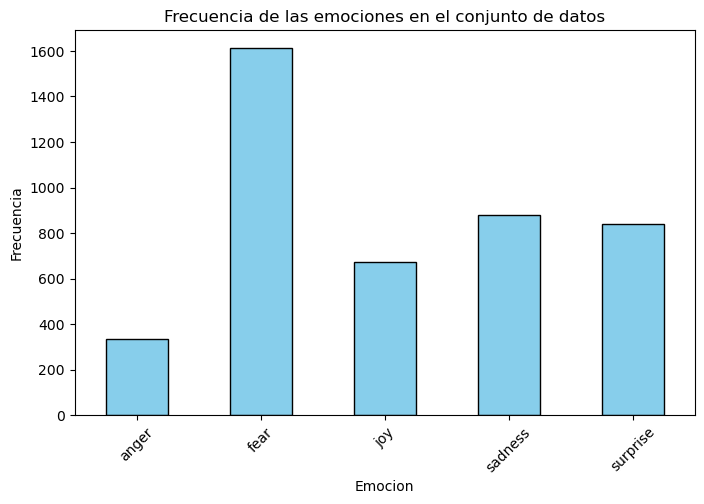

In [7]:
emotion_columns = ["anger", "fear", "joy", "sadness", "surprise"]
emotion_counts = dataset[emotion_columns].sum()
# grafica de barras
plt.figure(figsize=(8,5))
emotion_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frecuencia de las emociones en el conjunto de datos")
plt.xlabel("Emocion")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()

## Correlación entre las emociones en función de sus co-ocurrencias

Se desea explorar si existe alguna relación entre las emociones. Por ejemplo, es posible que emociones como anger y sadness puedan co-ocurrir en los textos. Para esto se calcula la matriz de correlación entre las emociones y se crea un mapa de calor a partir de esta.

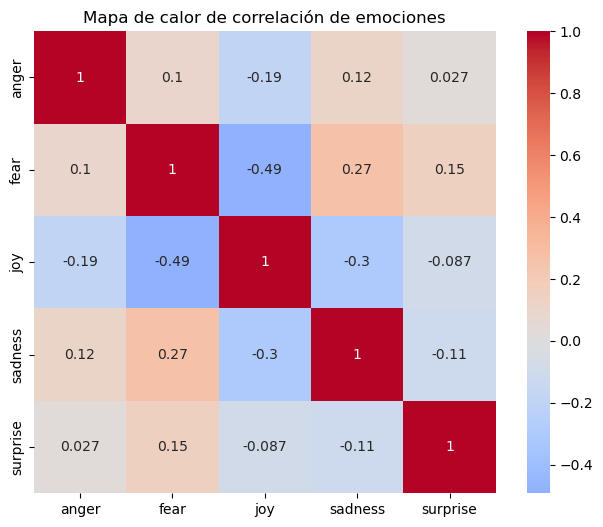

In [8]:
emotion_df = dataset[emotion_columns]
# calcular matriz de correlacion
correlation_matrix = emotion_df.corr()
# grafica usando un mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0, square=True)
plt.title("Mapa de calor de correlación de emociones")
plt.show()

A partir del mapa anterior, se observa que:
* emociones como anger y sadness, fear y sadness o fear y surprise tienden a aparecer juntas
* fear y joy, anger y joy o joy y sadness no aparecerían juntas en un mismo texto

## Relación entre longitud del texto y número de emociones etiquetadas
Se desea saber si la longitud del texto tiene alguna relación con la cantidad de emociones etiquetadas. Es decir, textos más largos podrían tener una mayor cantidad de emociones presentes. Se usa un gráfico de dispersión para ver cómo varía el número de emociones conforme cambia la longitud del texto. 

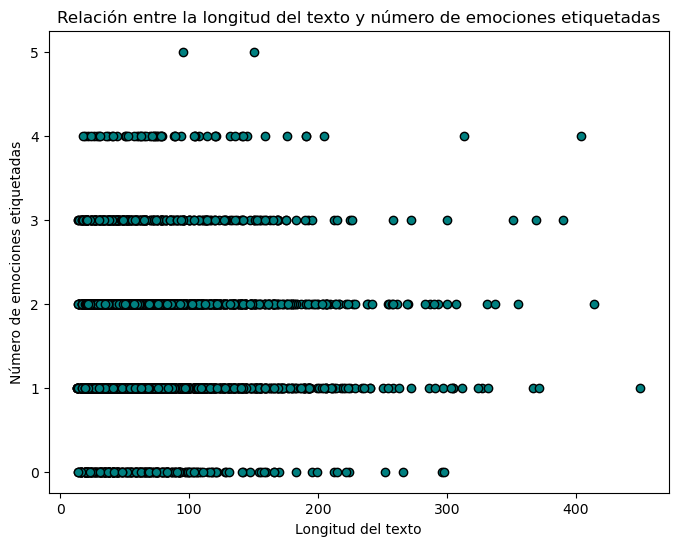

In [9]:
# calcular longitud de los textos
dataset["text_length"] = dataset["text"].apply(len)
# contar las emociones etiquetadas en cada fila
dataset["emotion_count"] = dataset[emotion_columns].sum(axis=1)
# grafico de dispersion
plt.figure(figsize=(8,6))
plt.scatter(dataset["text_length"], dataset["emotion_count"], color="teal", edgecolor="black")
plt.title("Relación entre la longitud del texto y número de emociones etiquetadas")
plt.xlabel("Longitud del texto")
plt.ylabel("Número de emociones etiquetadas")
plt.show()

## Distribución de la longitud de los textos 
Usando estadística descriptiva se estudia la distribución de la longitud de los textos. Asimismo, usando un diagrama de caja se visualiza dicha distribución. 

In [10]:
dataset["text_length"].describe()

count    2768.000000
mean       78.359827
std        54.791353
min        13.000000
25%        39.000000
50%        65.000000
75%       102.000000
max       450.000000
Name: text_length, dtype: float64

* La media de longitud de un texto es de ≈78 caracteres con una desviación estándar de ≈54
* El número mínimo de caracteres es 14 y el máximo de 450
* El primer cuartil se encuentra en 39 caracteres, el segundo en 65 y el tercero en 102
* El total de valores atípicos es de 128, tomando en cuenta 2 desviaciones estándar

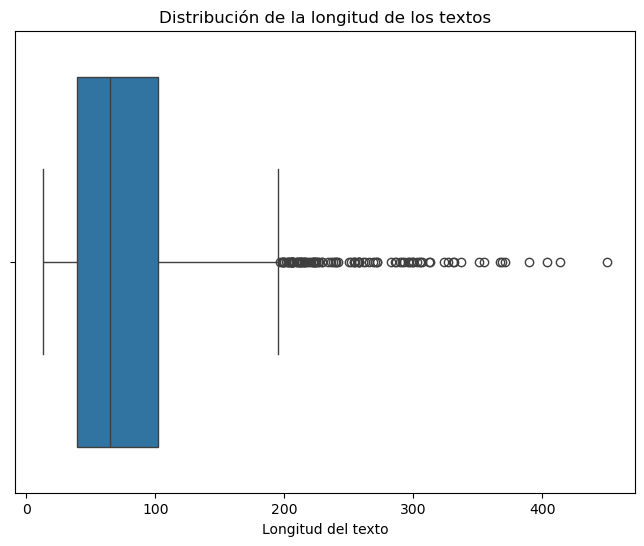

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dataset["text_length"])
plt.title("Distribución de la longitud de los textos")
plt.xlabel("Longitud del texto")
plt.show()

In [12]:
mean_text_length = dataset["text_length"].mean()
std_text_length = dataset["text_length"].std()
lower_bound = mean_text_length - 2 * std_text_length
upper_bound = mean_text_length + 2 * std_text_length
outliers = dataset[(dataset["text_length"] < lower_bound) | (dataset["text_length"] > upper_bound)]
print(f"Total de valores atípicos {len(outliers)}")


Total de valores atípicos 128


## Nubes de palabras por clase
Se desea identificar palabras asociadas a ciertas emociones. Por lo tanto, se analiza si existen patrones en el vocabulario de cada emoción. Esto indicaría que hay un sesgo en el lenguaje usado para expresar algunas emociones. Para hallar las palabras más comunes en textos que tienen una emoción en específico, se usa una nube de palabras, lo que permite identificar estos patrones de vocabulario.

In [13]:
en_stop_words = stopwords.words("english")
dataset["no_stop_words"] = dataset["text"].apply(lambda x: ' '.join([word for word in word_tokenize(x) if word.lower() not in en_stop_words]))

In [14]:
# diccionario para el texto de cada emoción
emotion_texts = {
    'anger': '',
    'fear': '',
    'joy': '',
    'sadness':'',
    'surprise': ''
}

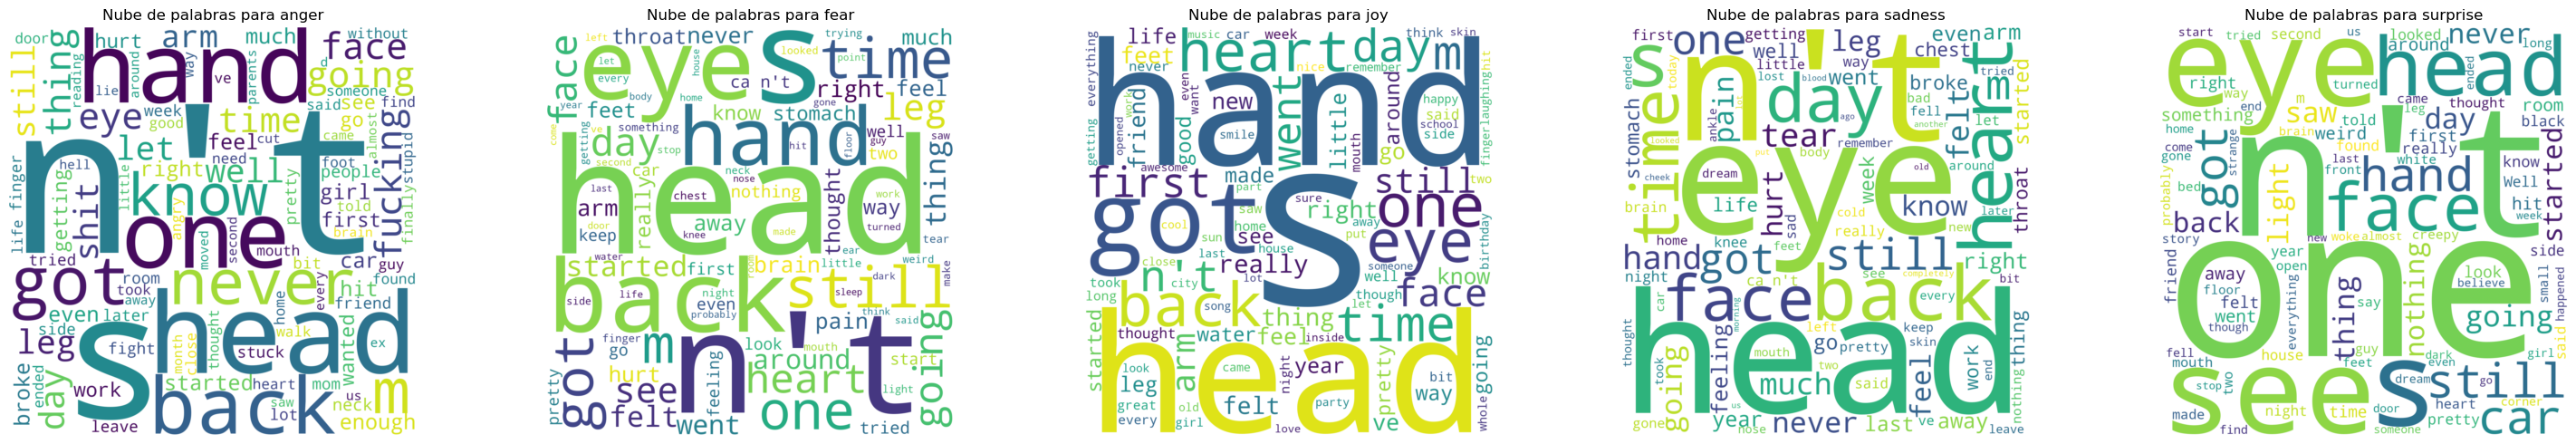

In [15]:
# concatenar los textos asociados a cada emoción
for emotion in emotion_texts.keys():
    emotion_texts[emotion] = ' '.join(dataset[dataset[emotion] == 1]["no_stop_words"])

# crear la nube para cada emoción
fig, axes = plt.subplots(1,5, figsize = (30, 5))
for i, (emotion, text) in enumerate(emotion_texts.items()):
    wordcloud = WordCloud(max_words=100, width = 1500, height= 1500, background_color = 'white').generate(text)
    axes[i].imshow(wordcloud, interpolation="bilinear")
    axes[i].set_title(f"Nube de palabras para {emotion}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

En la imagen anterior se encuentran las nubes de palabras para las emociones del conjunto. Entre las palabras se destacan_
1. Anger: fucking, stupid, stuck, hit, shit, broke
2. Fear: hurt, stomach, leg, throat, heart
3. Joy: feel, right, day, well, go, life
4. Sadness: heart, tear, still, hurt, leave
5. Surprise: saw, eye, head, light